# importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# access to the tables 

In [2]:
GameInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/GameInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchEventInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchEventInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchRoundInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTimeInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchSeasonInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTournamentInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVenueInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVotesInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
OddsInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/OddsInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PeriodInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PeriodInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PowerInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PowerInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()

# 1- the proportion of countries represented by the top 100 tennis players



,player_id,full_name,gender,current_rank,country
7393,152830,"Amoros Ramos, Pol",M,1858.0,Spain
1852,236825,"Rocens, Martins",M,1858.0,Latvia
758,97381,"Stenberg, Jonathan",M,1800.0,Sweden
1547,171072,"Hsu, Jeffrey Chuan En",M,1717.0,Chinese Taipei
515,377531,"Zhzhenov, Konstantin",M,1635.0,Russia
...,...,...,...,...,...
3652,232087,"Bergen, Mariia",F,NaN,Ukraine
4320,151258,"Jang, Eun Se",F,NaN,South Korea
7576,196406,"Shannan Zayid, Mubarak",M,NaN,Qatar
9709,267623,"Garcia, Raul",M,NaN,Bolivia


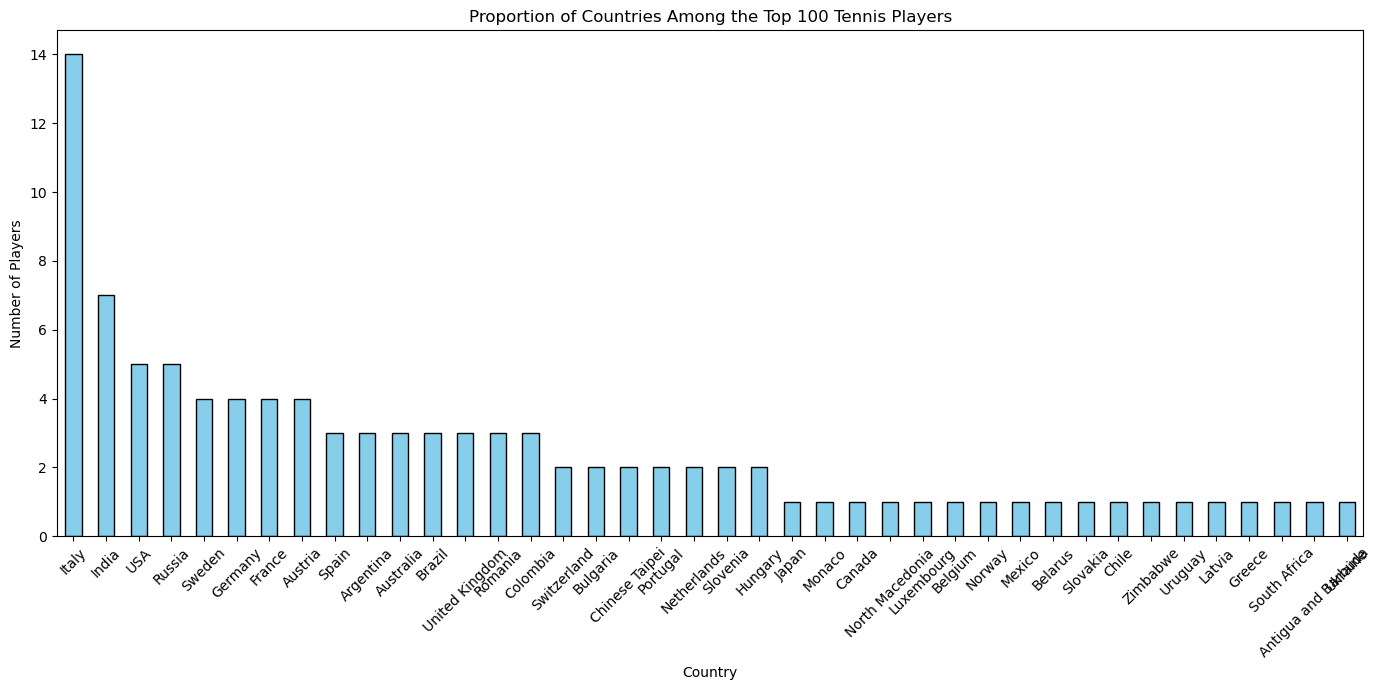

In [17]:


# Combine home and away team info to get a list of all players
players_df = pd.concat([MatchHomeTeamInfo[['player_id', 'full_name','gender', 'current_rank', 'country']], 
                        MatchAwayTeamInfo[['player_id', 'full_name','gender' ,'current_rank', 'country']]])

# Remove duplicates and sort by rank
players_df = players_df.drop_duplicates(subset=['player_id']).sort_values(by='current_rank' ,ascending=False)
display(players_df)
# Filter the top 100 players
top_100_players = players_df.head(100)

# Count the number of players from each country
country_counts = top_100_players['country'].value_counts()

# Plot the proportions of countries
plt.figure(figsize=(14, 7))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Proportion of Countries Among the Top 100 Tennis Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2- What proportion of the predictions became real ??

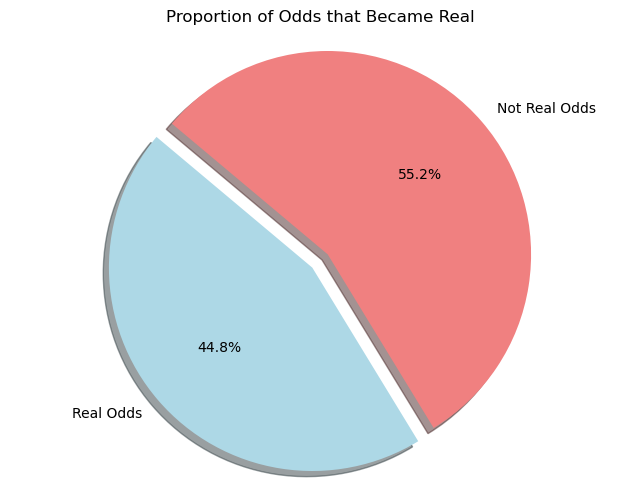

In [6]:
real_odds_count = OddsInfo['winnig'].sum()
not_real_odds_count = len(OddsInfo) - real_odds_count

# Plotting the pie chart
labels = ['Real Odds', 'Not Real Odds']
sizes = [real_odds_count, not_real_odds_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Real Odds)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proportion of Odds that Became Real')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3- Performance of players in different rounds by gender

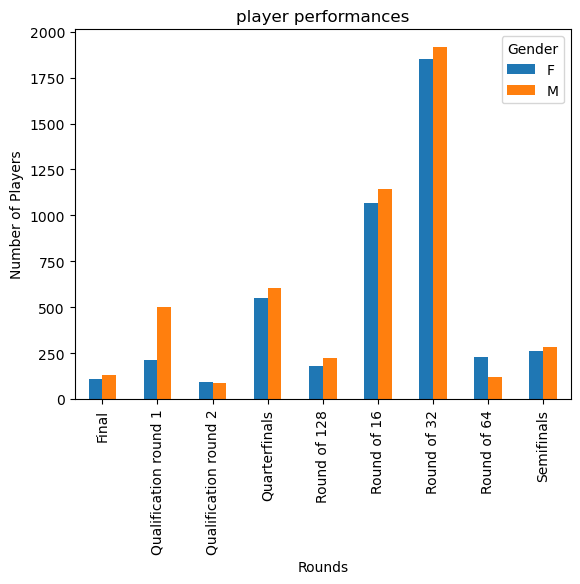

In [20]:
merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()
# Ignore null values
home_game_wins = merged_game_home[merged_game_home['scoring'] == 1][['match_id','player_id', 'full_name']].copy()
away_game_wins = merged_game_away[merged_game_away['scoring'] == 2][['match_id','player_id', 'full_name']].copy()

# Concating home and away team wins
all_game_wins = pd.concat([home_game_wins, away_game_wins]).drop_duplicates()
winnersBYGender = pd.merge(players_df[['full_name' , 'gender']] , all_game_wins, on='full_name')
winners_with_rounds= pd.merge(winnersBYGender , MatchRoundInfo[[ 'match_id', 'name']], on='match_id')


hand_gender_counts = winners_with_rounds.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Number of Players')
plt.title('player performances')
plt.legend(title='Gender')
plt.show()

# 4-what tournaments were being held in each host country ??

In [8]:
# Sample data similar to the description
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0).reset_index()

tournament_counts_long = tournament_counts.melt(id_vars=['country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Plotly
fig = px.bar(
    tournament_counts_long,
    x='country',
    y='Number of Tournaments',
    color='Tournament Name',
    title='Tournaments Held in Each Country',
    labels={'Number of Tournaments': 'Number of Tournaments', 'country': 'Country'},
    height=500,
    width=800
)
# Customize the layout for a more modern look
fig.update_layout(
    title={ 'text': 'Tournaments Held in Each Country', 'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' } ,
    legend_title_text='Tournament Name',
    legend=dict( orientation="v", yanchor="bottom", y=1.02, xanchor="right", x=1 ),
    barmode='stack',
    xaxis_title='Country',
    yaxis_title='Number of Tournaments'
)
fig.show()

# 5-Most tournaments are held in which cities of the most popular host country ??

In [9]:
""" finding the most popular country """
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0)
totalMatches = tournament_counts.groupby('country').sum().sum(axis=1).sort_values(ascending=False)
most_popular_country = totalMatches.idxmax()
most_popular_country

"""now calculating the mathces in each of the cities of the popular country """
popular_matches = MatchVenueInfo[MatchVenueInfo['country'] == most_popular_country]
grouped_cities =(popular_matches.groupby('city' ,as_index= False)
                 .agg(totalPlayes = ('match_id','count'))
                 .sort_values('totalPlayes', ascending=False))
grouped_cities

,city,totalPlayes
5,Paris,517
7,Saint-Gaudens,57
2,Carnac,56
3,Deauville,55
4,Lyon,42
1,Bordeaux,40
8,Strasbourg,40
0,Aix-en-Provence,26
6,Saint Malo,20
